**IMPORTING LIRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

**IMPORTING DATASET**

In [2]:
dataset=pd.read_csv("carprice.csv")

In [3]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**DATA CLEANING**

In [4]:
dataset.shape

(205, 26)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**LABEL ENCODING**

In [6]:
from sklearn.preprocessing import LabelEncoder
object_data = dataset.select_dtypes(include='object')
num_data = dataset.select_dtypes(exclude='object')

enc = LabelEncoder()
for i in range(0, object_data.shape[1]):
    object_data.iloc[:,i] = enc.fit_transform(object_data.iloc[:,i])  

In [7]:
object_data.dtypes

CarName           int64
fueltype          int64
aspiration        int64
doornumber        int64
carbody           int64
drivewheel        int64
enginelocation    int64
enginetype        int64
cylindernumber    int64
fuelsystem        int64
dtype: object

In [8]:
full_data = pd.concat([num_data, object_data], axis = 1)

In [9]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
 16  CarName           205 non-null    int64  
 1

**VISUALIZATION**

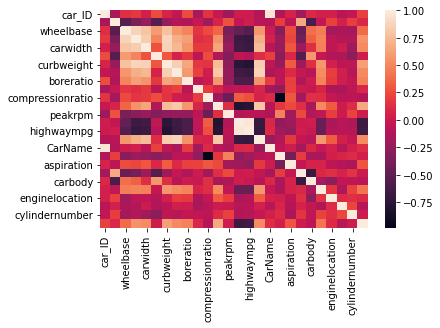

In [10]:
sns.heatmap(full_data.corr())

In [11]:
full_data.corr()["price"].sort_values()

highwaympg         -0.697599
citympg            -0.685751
CarName            -0.231439
car_ID             -0.109093
fueltype           -0.105679
peakrpm            -0.085267
carbody            -0.083976
symboling          -0.079978
doornumber         -0.031835
cylindernumber     -0.027628
enginetype          0.049171
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
aspiration          0.177926
enginelocation      0.324973
fuelsystem          0.526823
boreratio           0.553173
wheelbase           0.577816
drivewheel          0.577992
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

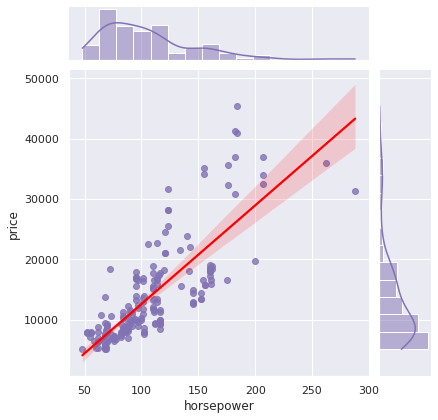

In [12]:
sns.set_theme(style="darkgrid") 
sns.jointplot(x="horsepower", y="price", data=full_data, 
	kind="reg", color="m", line_kws={'color': 'red'}) 
plt.show() 

**STANDARD SCALER**

In [13]:
scdata=full_data.copy()

In [14]:
from sklearn.preprocessing import StandardScaler
a=scdata.drop(columns="price")
b=scdata["price"]
sc=StandardScaler()
a=sc.fit_transform(a)
a

array([[-1.72362229,  1.74347043, -1.6907718 , ..., -2.86510549,
        -0.14747536,  0.8695675 ],
       [-1.70672403,  1.74347043, -1.6907718 , ..., -2.86510549,
        -0.14747536,  0.8695675 ],
       [-1.68982577,  0.133509  , -0.70859588, ...,  1.88688986,
         1.11220997,  0.8695675 ],
       ...,
       [ 1.68982577, -1.47645244,  1.72187336, ...,  1.88688986,
         1.11220997,  0.8695675 ],
       [ 1.70672403, -1.47645244,  1.72187336, ..., -0.01390828,
         1.11220997, -0.12630589],
       [ 1.72362229, -1.47645244,  1.72187336, ..., -0.01390828,
        -0.14747536,  0.8695675 ]])

In [15]:
from sklearn.model_selection import train_test_split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(a, b, train_size=0.7)

**LINEAR REGRESSION**

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()
lr.fit(X_train_s,y_train_s)

LinearRegression()

In [18]:
y_pred=lr.predict(X_test_s)

In [19]:
print(lr.score(X_test_s,y_test_s))

0.8275151890742531
